In [1]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv("lottery_data.csv")

# Display the first few rows to get an overview of the data
df.head()

C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_8740\2305248189.py:4: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("lottery_data.csv")


,LOTTO GAME,COMBINATIONS,DRAW DATE
0,Grand Lotto 6/55,45-35-55-47-37-42,1/15/2024
1,Megalotto 6/45,07-22-04-23-27-40,1/15/2024
2,Ultra Lotto 6/58,23-40-08-42-45-55,1/14/2024
3,Superlotto 6/49,29-35-24-20-02-43,1/14/2024
4,Grand Lotto 6/55,11-28-53-54-03-37,1/13/2024


<Axes: title={'center': 'Frequency of Lottery Games'}, xlabel='LOTTO GAME'>

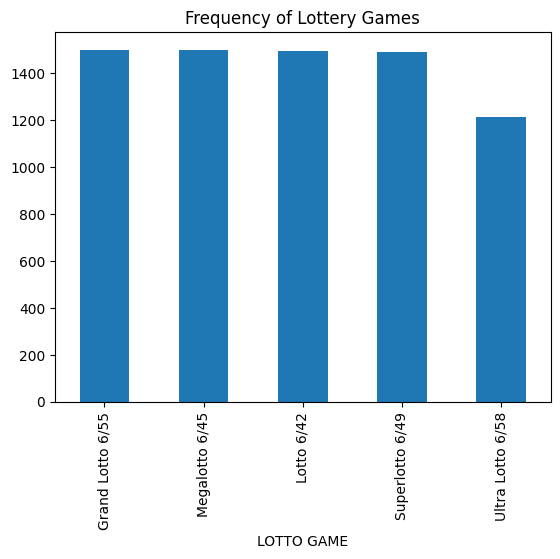

In [4]:
# Check the frequency of each lottery game
game_frequency = df['LOTTO GAME'].value_counts()

# Plot a bar chart for better visualization
game_frequency.plot(kind='bar', title='Frequency of Lottery Games')

In [5]:
# Split the combination string into individual numbers
numbers = df['COMBINATIONS'].apply(lambda x: [int(num) for num in x.split('-')])

# Flatten the list of numbers
flat_numbers = [num for sublist in numbers for num in sublist]

# Create a Pandas Series for easier analysis
numbers_series = pd.Series(flat_numbers)

# Plot a histogram to visualize the distribution of numbers
numbers_series.hist(bins=range(1, 60), align='left', rwidth=0.8, color='#607c8e')
plt.title('Number Distribution in Combinations')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()


AttributeError: 'float' object has no attribute 'split'

corrected

C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_8740\2238607443.py:5: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("lottery_data.csv")


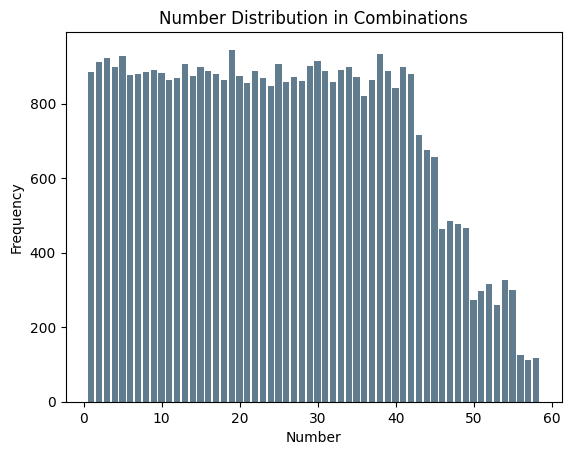

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named "lottery_data.csv"
df = pd.read_csv("lottery_data.csv")

# Drop rows with missing values in the 'COMBINATIONS' column
df = df.dropna(subset=['COMBINATIONS'])

# Split the combination string into individual numbers
numbers = df['COMBINATIONS'].apply(lambda x: [int(num) for num in x.split('-')])

# Flatten the list of numbers
flat_numbers = [num for sublist in numbers for num in sublist]

# Create a Pandas Series for easier analysis
numbers_series = pd.Series(flat_numbers)

# Plot a histogram to visualize the distribution of numbers
plt.hist(numbers_series, bins=range(1, max(numbers_series) + 2), align='left', rwidth=0.8, color='#607c8e')
plt.title('Number Distribution in Combinations')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Convert 'DRAW DATE' to datetime format
df['DRAW DATE'] = pd.to_datetime(df['DRAW DATE'])

# Plot the number of draws over time
draws_over_time = df.groupby('DRAW DATE').size()
draws_over_time.plot(title='Number of Draws Over Time', xlabel='Draw Date', ylabel='Number of Draws')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named "lottery_data.csv"
df = pd.read_csv("lottery_data.csv")

# Convert 'DRAW DATE' to datetime format
df['DRAW DATE'] = pd.to_datetime(df['DRAW DATE'])

# Function to extract numbers based on the game type
def extract_numbers(row):
    game_type = row['LOTTO GAME']
    combinations = [int(num) for num in row['COMBINATIONS'].split('-')]
    
    if '6/42' in game_type:
        return combinations[:6]
    elif '6/45' in game_type:
        return combinations[:6]
    elif '6/49' in game_type:
        return combinations[:6]
    elif '6/55' in game_type:
        return combinations[:6]
    elif '6/58' in game_type:
        return combinations[:6]

# Apply the function to create a new column 'NUMBERS'
df['NUMBERS'] = df.apply(extract_numbers, axis=1)

# Flatten the list of numbers
flat_numbers = [num for sublist in df['NUMBERS'] for num in sublist]

# Create a Pandas Series for easier analysis
numbers_series = pd.Series(flat_numbers)

# Plot a histogram to visualize the distribution of numbers
plt.hist(numbers_series, bins=range(1, max(numbers_series) + 2), align='left', rwidth=0.8, color='#607c8e')
plt.title('Number Distribution in Lottery Combinations')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()


Descriptive Statistics:

Descriptive statistics provide a summary of the main aspects of a dataset. We can calculate statistics like mean, median, and standard deviation to gain insights into the central tendency and variability of the data.

In [ ]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv("lottery_data.csv")

# Display basic statistics of numerical columns
descriptive_stats = df.describe()
descriptive_stats

Time-Series Analysis:

Since your data involves dates, you can perform time-series analysis to identify trends and patterns over time.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df = pd.read_csv("lottery_data.csv")

# Convert 'DRAW DATE' to datetime format
df['DRAW DATE'] = pd.to_datetime(df['DRAW DATE'])

# Group by draw date and count the number of draws on each date
draws_over_time = df.groupby('DRAW DATE').size()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(draws_over_time.index, draws_over_time.values, marker='o', linestyle='-')
plt.title('Number of Draws Over Time')
plt.xlabel('Draw Date')
plt.ylabel('Number of Draws')
plt.show()

Machine Learning (Predictive Analysis):

You can use machine learning to predict future outcomes based on historical data. For simplicity, let's create a basic linear regression model to predict the number of draws.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert 'DRAW DATE' to numerical values for modeling
df['DRAW DATE'] = pd.to_numeric(df['DRAW DATE'])

# Use 'DRAW DATE' as the feature and 'Number of Draws' as the target
X = df[['DRAW DATE']].values
y = df.groupby('DRAW DATE').size().values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Print the coefficients and intercept
print(f'Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}')

# Plot the predictions against the actual values
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.title('Linear Regression: Predicted vs Actual Number of Draws')
plt.xlabel('Draw Date')
plt.ylabel('Number of Draws')
plt.show()